In [111]:
!pip install pandas
!pip install matplotlib

In [112]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd

In [113]:
url = 'https://www.timesnownews.com/sports/from-1951-to-2023-a-look-at-indias-medal-tally-in-the-asian-games-over-the-years-article-104167159'

In [114]:
response = requests.get(url).text

In [115]:
# Parse the HTML content of the page
soup = BeautifulSoup(response, 'html.parser')
soup.prettify()

'<!DOCTYPE html>\n<html class="no-js" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="ie=edge" http-equiv="x-ua-compatible"/>\n  <meta content="width=device-width, initial-scale=1, maximum-scale=5.0" name="viewport"/>\n  <meta content="en" http-equiv="content-language"/>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <meta content="true" name="HandheldFriendly"/>\n  <meta content="width" name="MobileOptimized"/>\n  <meta content="yes" name="mobile-web-app-capable"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <meta content="TimesNow" property="og:site_name"/>\n  <meta content="summary_large_image" name="twitter:card"/>\n  <meta content="TIMESNOW" name="twitter:site"/>\n  <meta content="@TIMESNOW" property="twitter:creator"/>\n  <meta content="1280" property="og:image:width"/>\n  <meta content="720" property="og:image:height"/>\n  <meta content="#ffffff" 

In [116]:
# Locate the table you want to extract data from
table = soup.find('table')

In [117]:
data = pd.DataFrame(columns=["Year", "Total"])
# Loop through the table rows and extract "Year" and "Total" data
for row in table.tbody.find_all('tr'):
    columns = row.find_all('td')
    if (columns !=[]):
        Year = columns[0].text.strip()
        Total = columns[4].text.strip() # Assuming the second column contains numeric data
        dt = pd.DataFrame({"Year":[Year], "Total":[Total]})
        data = pd.concat([data, dt])
    else:
        print("Failed to retrieve the web page. Status code:", response.status_code)


In [118]:
  # Display the DataFrame
data

,Year,Total
0,Year,Total
0,1951,51
0,1954,17
0,1958,13
0,1962,33
0,1966,21
0,1970,25
0,1974,28
0,1978,28
0,1982,57


In [126]:
data['Total'] = data['Total'].astype(str)

# Remove asterisk (*) from the 'Total' column
data['Total'] = data['Total'].str.replace('*', '')

# Convert the 'Total' column to numeric
data['Total'] = pd.to_numeric(data['Total'], errors='coerce')


C:\Users\Ankur\AppData\Local\Temp\ipykernel_1128\3728587044.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Total'] = data['Total'].str.replace('*', '')


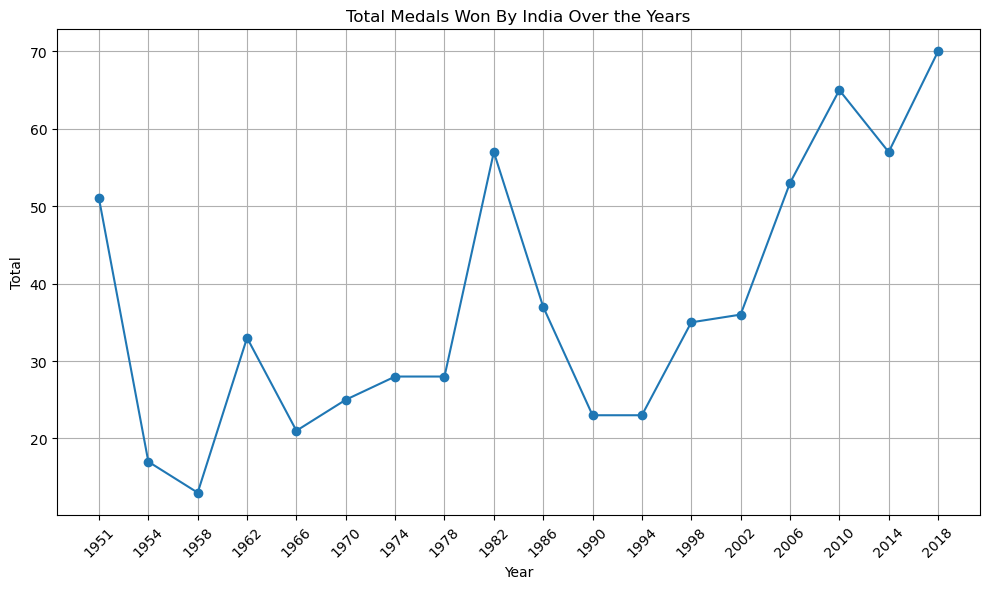

In [127]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Total'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Total Medals Won By India Over the Years')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()